# PyParticleBunch Matching
### Test Matching of initial distribution to accelerator optical parameters (Twiss)

- Define matching methods
- create functions

$$
x_{norm} = \sqrt{\frac{1}{\beta_x}}x
$$

$$
x^{\prime}_{norm} = \sqrt{\frac{1}{\beta_x}}\alpha_x x + \sqrt{\beta_x} x^{\prime}
$$

We can achieve 6D matching in phase space using the following matrix multiplication:

$$
\bf{p_f = DBA p_i}
$$

Where the particle is represented by a 6D co-ordinate in phase space:
$$
p = \begin{bmatrix}
    x\\
    x^{\prime}\\
    y\\
    y^{\prime} \\
    ct \\
    \delta 
\end{bmatrix}
$$
and the subscripts f and i indicate the initial and final particle co-ordinates (before and after the matching transformation).

And the matrices *DBA* represent the Courant-Snyder transformations for dispersion (D), betatron amplitude function $\beta$ (B), and correlation function $\alpha$ (A) 

$$
D = \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0\\
    0 & 1 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 0\\
    D_x & D_{x^{\prime}} & D_y & D_{y^{\prime}} & 0 & 1\\
\end{bmatrix}
$$

$$
B = \begin{bmatrix}
    \sqrt{\beta_x} & 0 & 0 & 0 & 0 & 0\\
    0 & \frac{1}{\sqrt{\beta_x}} & 0 & 0 & 0 & 0\\
    0 & 0 & \sqrt{\beta_y} & 0 & 0 & 0\\
    0 & 0 & 0 & \frac{1}{\sqrt{\beta_x}} & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 0\\
    0 & 0 & 0 & 0 & 0 & 1\\
\end{bmatrix}
$$

$$
A = \begin{bmatrix}
    1 & 0 & 0 & 0 & 0 & 0\\
    -\alpha_x & 1 & 0 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0 & 0\\
    0 & 0 & -\alpha_y & 1 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 0\\
    0 & 0 & 0 & 0 & 0 & 1\\
\end{bmatrix}
$$

[1] H. Rafique PhD Thesis, pg. 136: http://eprints.hud.ac.uk/id/eprint/32605/1/Final%20Thesis.pdf

### In 2 dimensions (x, xp)

$$
D_x = 
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
\end{bmatrix},~~~
B_x = 
\begin{bmatrix}
    \sqrt{\beta_x} & 0 \\
    0 & \frac{1}{\sqrt{\beta_x}}\\
\end{bmatrix},~~~
A_x = 
\begin{bmatrix}
    1 & 0 \\
    -\alpha_x & 1 \\
\end{bmatrix}
$$

As the matrix $D_x$ is equal to the identity matrix $I$ it may be removed from the 2D and 4D matching transformation (absense of correlation with the longitudinal plane)

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

### 2D Matrices 

In [2]:
def Beta_Matrix(beta): return np.array([[np.sqrt(beta),0],[0,(1/np.sqrt(beta))]])

In [3]:
def Alpha_Matrix(alpha): return np.array([[1,0],[-alpha,1]])

### 4D Matrices

In [4]:
def Beta_Matrix_4(beta_x, beta_y): 
    return np.array([[np.sqrt(beta_x),0,0,0],
         [0,(1/np.sqrt(beta_x)),0,0],
         [0,0,np.sqrt(beta_y),0],
         [0,0,0,(1/np.sqrt(beta_y))]])

In [5]:
def Alpha_Matrix_4(alpha_x, alpha_y): 
    return np.array([[1,0,0,0],
         [-alpha_x,1,0,0],
         [0,0,1,0],
         [0,0,-alpha_y,1]])

In [6]:
def Matching_Matrix_4(beta_x, beta_y, alpha_x, alpha_y):
    A = Alpha_Matrix_4(alpha_x, alpha_y)
    B = Beta_Matrix_4(beta_x, beta_y)
    
    # Matrix multiplication is not commutative AB != BA
    return np.matmul(B,A)    

### 6D Matrices

In [7]:
def Beta_Matrix_6(beta_x, beta_y): 
    return np.array([[np.sqrt(beta_x),0,0,0,0,0],
         [0,(1/np.sqrt(beta_x)),0,0,0,0],
         [0,0,np.sqrt(beta_y),0,0,0],
         [0,0,0,(1/np.sqrt(beta_y)),0,0],
         [0,0,0,0,1,0],
         [0,0,0,0,0,1]])

In [8]:
def Alpha_Matrix_6(alpha_x, alpha_y): 
    return np.array([[1,0,0,0,0,0],
         [-alpha_x,1,0,0,0,0],
         [0,0,1,0,0,0],
         [0,0,-alpha_y,1,0,0],
         [0,0,0,0,1,0],
         [0,0,0,0,0,1]])

In [9]:
def Delta_Matrix_6(D_x, D_y, D_xp, D_yp): 
    return np.array([[1,0,0,0,0,0],
         [0,1,0,0,0,0],
         [0,0,1,0,0,0],
         [0,0,0,1,0,0],
         [0,0,0,0,1,0],
         [D_x, D_xp, D_y, D_yp,0,1]])

In [10]:
def Matching_Matrix_6(beta_x, beta_y, alpha_x, alpha_y, D_x, D_y, D_xp, D_yp):
    A = Alpha_Matrix_6(alpha_x, alpha_y)
    B = Beta_Matrix_6(beta_x, beta_y)
    D = Delta_Matrix_6(D_x, D_y, D_xp, D_yp)
    
    # Matrix multiplication is associative (AB)C = A(BC)
    C = np.matmul(D, B)
    return np.matmul(C, A)
    

### ISIS-II EH RCS Lattice Start

In [11]:
beta_x = 3.215250830692
beta_y = 18.598794417925
alpha_x =  -0.547366008626
alpha_y =  2.750780302852
D_x =  -0.000103040524
D_xp = 0.001254020379
D_y = 0.
D_yp = 0.

Use numbers from ISIS-II EH RCS

In [12]:
Test_Matching_Matrix_4 = Matching_Matrix_4(beta_x, beta_y, alpha_x, alpha_y)

In [13]:
Test_Matching_Matrix_4

array([[ 1.79311205,  0.        ,  0.        ,  0.        ],
       [ 0.30526035,  0.55768963,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.31263196,  0.        ],
       [ 0.        ,  0.        , -0.63784258,  0.23187696]])

In [14]:
Test_Matching_Matrix_6 = Matching_Matrix_6(beta_x, beta_y, alpha_x, alpha_y, D_x, D_y, D_xp, D_yp)

In [15]:
Test_Matching_Matrix_6

array([[ 1.79311205e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.05260348e-01,  5.57689632e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.31263196e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -6.37842582e-01,
         2.31876963e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.98039492e-04,  6.99354163e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [16]:
if Test_Matching_Matrix_6.shape == (6,6):
    print('SUCESS')

SUCESS


### Apply matching to general particles

In [17]:
def Multiply_Matrices(matrix1, matrix2): return np.matmul(matrix1, matrix2)

In [18]:
def Apply_2D_Matching(u, up, alpha, beta):
    A_matrix = Alpha_Matrix(alpha)
    B_matrix = Beta_Matrix(beta)
    
    p = [u,up]
    p_1 = Multiply_Matrices(A_matrix, p)
    p_2 = Multiply_Matrices(B_matrix, p_1)
    return p_2
    

In [19]:
def Apply_4D_Matching(p_in, beta_x, beta_y, alpha_x, alpha_y):    
    MM4 = Matching_Matrix_4(beta_x, beta_y, alpha_x, alpha_y) 
    return np.matmul(MM4, p_in)    

In [20]:
def Apply_6D_Matching(p_in, beta_x, beta_y, alpha_x, alpha_y, D_x, D_y, D_xp, D_yp):    
    MM6 = Matching_Matrix_6(beta_x, beta_y, alpha_x, alpha_y, D_x, D_y, D_xp, D_yp)
    return np.matmul(MM6, p_in)    

# Use numpy to generate a Gaussian

The mean variance of the Gaussian $\sigma$ should be equal to the square root of the emittance $\epsilon$ to match our beam

# Emittance

- Maximum beam width = 750 $\pi$ mm mrad
- Not to be confused with Gaussian standard deviation $\sigma$
- In this case the emittance is defined by a 0.01% loss level 
- 400 $\pi$ mm mrad is defined as the 99% emittance i.e. 6 $\sigma$
- 600 $\pi$ mm mrad is defined as the 0.1% loss level i.e. 7 $\sigma$
- 750 $\pi$ mm mrad is defined as the 0.01% loss level i.e. 8 $\sigma$


In [21]:
emittance = 400 * 1E-6 * np.pi
print('emittance  = ', emittance, 'm rad')
print('emittance  = ', emittance*1E6, 'mm mrad')
print('emittance  = ', (emittance*1E6)/np.pi, 'pi mm mrad')

emittance  =  0.0012566370614359172 m rad
emittance  =  1256.6370614359173 mm mrad
emittance  =  400.0 pi mm mrad


In [22]:
# Assuming no dispersion: At extraction septum
h_beam_size = np.sqrt(emittance * beta_x)
v_beam_size = np.sqrt(emittance * beta_y)
print('Horizontal beam width = ', h_beam_size)
print('Vertical beam width = ', v_beam_size)

Horizontal beam width =  0.063564167230132
Vertical beam width =  0.15287882248235696


In [23]:
h_half_beam_width = h_beam_size/2
h_half_beam_width

0.031782083615066

In [24]:
v_half_beam_width = v_beam_size/2
v_half_beam_width

0.07643941124117848

In [25]:
gaussian_std_dev = h_half_beam_width/3.
gaussian_std_dev

0.010594027871688666

In [26]:
mean = 0
bunch_size = int(1E5)

In [27]:
x = np.random.normal(mean, gaussian_std_dev, bunch_size)
xp = np.random.normal(mean, gaussian_std_dev, bunch_size)

In [28]:
import matplotlib.pyplot as plt

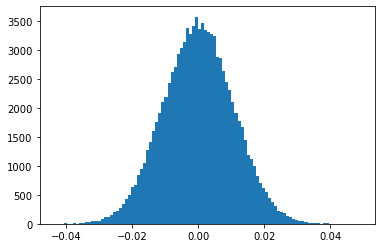

In [29]:
plt.hist(x, bins=100);

In [30]:
np.max(x)

0.048733828924967665

In [31]:
np.min(x)

-0.043347426514525854

In [32]:
h_beam_size/2

0.031782083615066

Arrange Gaussian distributed data into pairs for x,x' ready for matrix multiplication

#  Perform matrix multiplication

In [33]:
# ISIS-II Start 3.215250830692 -0.547366008626 18.598794417925 2.750780302852

In [34]:
beta_x = 3.215250830692 
alpha_x = -0.547366008626

In [35]:
A_matrix = Alpha_Matrix(alpha_x)

In [36]:
A_matrix

array([[1.        , 0.        ],
       [0.54736601, 1.        ]])

In [37]:
B_matrix = Beta_Matrix(beta_x)

In [38]:
B_matrix

array([[1.79311205, 0.        ],
       [0.        , 0.55768963]])

In [39]:
x_out = []
xp_out = []

In [40]:
for i in range(0,len(x),1):
    p_f = Apply_2D_Matching(x[i], xp[i], alpha_x, beta_x)
    x_out.append(p_f[0])
    xp_out.append(p_f[1])

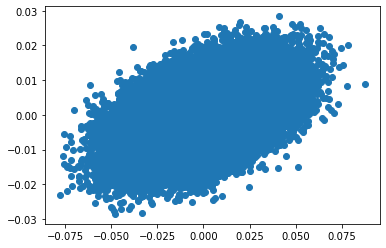

In [41]:
plt.scatter(x_out, xp_out);

# Function to generate matched 2D distribution 

In [42]:
def Generate_Matched_2D_Gaussian(n_part, std_dev, beta, alpha):
        
    u = np.random.normal(0.0, std_dev, int(n_part))
    up = np.random.normal(0.0, std_dev, int(n_part))
    
    Beta_Matrix = np.array([[np.sqrt(beta),0],[0,(1/np.sqrt(beta))]])
    Alpha_Matrix = np.array([[1,0],[-alpha,1]])
    
    u_f = []
    up_f = []
    
    for i in range(0,len(u),1):        
        p = [u[i], up[i]]
        p_1 = Multiply_Matrices(Alpha_Matrix, p)
        p_2 = Multiply_Matrices(Beta_Matrix, p_1)
        u_f.append(p_2[0])
        up_f.append(p_2[1])
    
    return u_f, up_f
    

In [43]:
# ISIS-II 1.2 GeV extracted protons
#gamma_rel =  2.28
#beta_rel =  0.899

# ISIS-II 0.4 GeV injected protons
gamma_rel =  1.43
beta_rel =  0.713

In [44]:
emittance = 400 * 1E-6 * np.pi
emittance_norm = emittance/(beta_rel*gamma_rel)
emittance = 1E-3

#beta_x = 3.183218456327 # Start of ISIS_II EH RCS extraction super-period
#alpha_x = -0.002213666757
#beta_x = 13.391854603922 # Centre of first dipole in ISIS_II EH RCS extraction super-period
#alpha_x = -0.023336269809 # maximum beam size
# Lattice start
beta_x = 3.215250830692 
alpha_x = -0.547366008626

beam_size = np.sqrt(emittance * beta_x)
half_beam_width = beam_size/2
gaussian_std_dev = half_beam_width/3
test_x, test_xp = Generate_Matched_2D_Gaussian(1E5, gaussian_std_dev, beta_x, alpha_x)

In [45]:
emittance_norm

0.0012324925327199337

In [46]:
np.sqrt(beta_x * emittance_norm)

0.06295055710356703

## ISIS-II Lattice start X 

<ipython-input-47-07068a7b6adb>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  my_cmap.set_under('w',1)


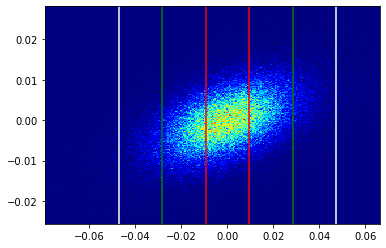

In [47]:
my_cmap = plt.cm.jet
my_cmap.set_under('w',1)

plt.hist2d(test_x, test_xp, (256, 256), range=[[np.min(test_x),np.max(test_x)], [np.min(test_xp), np.max(test_xp)]], cmap=my_cmap);

sigma = gaussian_std_dev

plt.vlines(5*sigma, -1, 1, color='w');
plt.vlines(-5*sigma, -1, 1, color='w');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

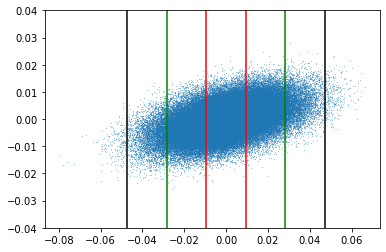

In [48]:
plt.scatter(test_x, test_xp, s=0.1, marker='.');
plt.ylim(-0.04,0.04)

sigma = gaussian_std_dev

plt.vlines(5*sigma, -1, 1, color='k');
plt.vlines(-5*sigma, -1, 1, color='k');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

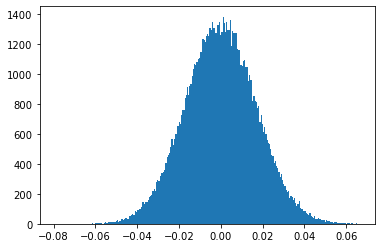

In [49]:
plt.hist(test_x, bins=256);

In [50]:
# ISIS-II 1.2 GeV extracted protons
#gamma_rel =  2.28
#beta_rel =  0.899

# ISIS-II 0.4 GeV injected protons
gamma_rel =  1.43
beta_rel =  0.713

In [51]:
emittance = 400 * 1E-6 * np.pi
emittance_norm = emittance/(beta_rel*gamma_rel)
emittance = 1E-3
#beta_x = 3.183218456327 # Start of ISIS_II EH RCS extraction super-period
#alpha_x = -0.002213666757

#beta_x = 13.391854603922 # Centre of first dipole in ISIS_II EH RCS extraction super-period
#alpha_x = -0.023336269809 # maximum beam size

beta_y = 18.598794417925 # Start of lattice (vertical)
alpha_y = 2.750780302852

beam_size = np.sqrt(emittance * beta_y)
half_beam_width = beam_size/2
gaussian_std_dev_y = half_beam_width/3
test_y, test_yp = Generate_Matched_2D_Gaussian(1E5, gaussian_std_dev_y, beta_y, alpha_y)

In [52]:
print(beam_size)

0.13637739701990576


## ISIS-II Lattice start Y 

<ipython-input-53-0d1b725d7083>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  my_cmap.set_under('w',1)


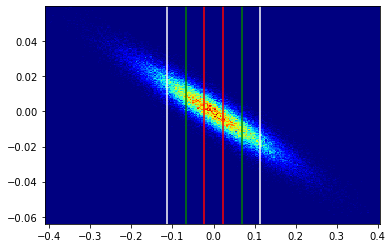

In [53]:
my_cmap = plt.cm.jet
my_cmap.set_under('w',1)

plt.hist2d(test_y, test_yp, (256, 256),  range=[[np.min(test_y),np.max(test_y)], [np.min(test_yp), np.max(test_yp)]], cmap=my_cmap);

sigma = gaussian_std_dev_y

plt.vlines(5*sigma, -1, 1, color='w');
plt.vlines(-5*sigma, -1, 1, color='w');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

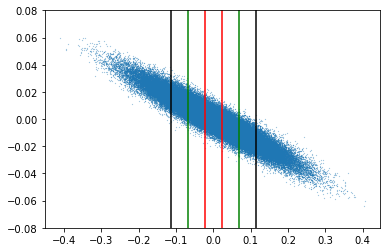

In [54]:
plt.scatter(test_y, test_yp, s=0.1, marker='.');
plt.ylim(-0.08,0.08)

sigma = gaussian_std_dev_y

plt.vlines(5*sigma, -1, 1, color='k');
plt.vlines(-5*sigma, -1, 1, color='k');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

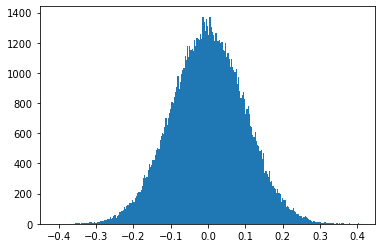

In [55]:
plt.hist(test_y, bins=256);

# ISIS-II Lattice start XY 

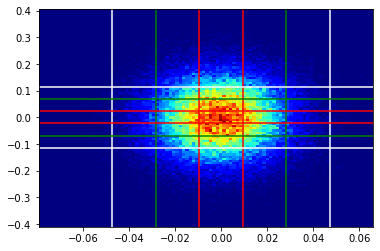

In [56]:
plt.hist2d(test_x, test_y, (100, 100),  range=[[np.min(test_x),np.max(test_x)], [np.min(test_y), np.max(test_y)]], cmap=plt.cm.jet);

sigma = gaussian_std_dev

plt.vlines(5*sigma, -1, 1, color='w');
plt.vlines(-5*sigma, -1, 1, color='w');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

sigma = gaussian_std_dev_y

plt.hlines(5*sigma, -1, 1, color='w');
plt.hlines(-5*sigma, -1, 1, color='w');

plt.hlines(sigma, -1, 1, color='r');
plt.hlines(-sigma, -1, 1, color='r');

plt.hlines(3*sigma, -1, 1, color='green');
plt.hlines(-3*sigma, -1, 1, color='green');

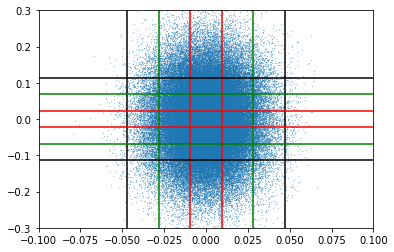

In [57]:
plt.scatter(test_x, test_y, s=0.1, marker='.');
plt.ylim(-0.3,0.3)
plt.xlim(-0.1,0.1)

sigma = gaussian_std_dev

plt.vlines(5*sigma, -1, 1, color='k');
plt.vlines(-5*sigma, -1, 1, color='k');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

sigma = gaussian_std_dev_y

plt.hlines(5*sigma, -1, 1, color='k');
plt.hlines(-5*sigma, -1, 1, color='k');

plt.hlines(sigma, -1, 1, color='r');
plt.hlines(-sigma, -1, 1, color='r');

plt.hlines(3*sigma, -1, 1, color='green');
plt.hlines(-3*sigma, -1, 1, color='green');

#### Extraction point ISIS-II

In [58]:
emittance = 400 * 1E-6 * np.pi
emittance_norm = emittance/(beta_rel*gamma_rel)
beta_x = 4.054007450838  # Centre of ISIS-II straight (Extraction point)
alpha_x = -0.000000000000

beam_size = np.sqrt(emittance * beta_x)
half_beam_width = beam_size/2
gaussian_std_dev = half_beam_width/4.5
test_u, test_up = Generate_Matched_2D_Gaussian(1E6, gaussian_std_dev, beta_x, alpha_x)

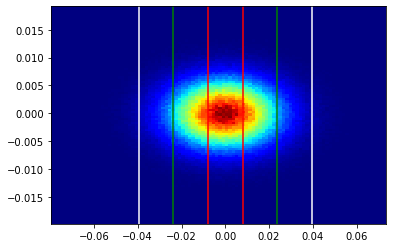

In [59]:
plt.hist2d(test_u, test_up, (100, 100),  range=[[np.min(test_u),np.max(test_u)], [np.min(test_up), np.max(test_up)]], cmap=plt.cm.jet);

sigma = gaussian_std_dev

plt.vlines(5*sigma, -1, 1, color='w');
plt.vlines(-5*sigma, -1, 1, color='w');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

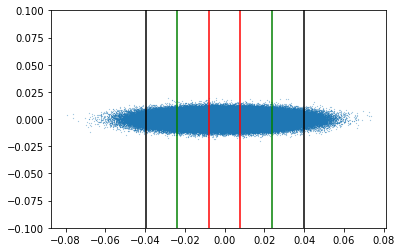

In [60]:
plt.scatter(test_u, test_up, s=0.1, marker='.');
plt.ylim(-0.1,0.1)

sigma = gaussian_std_dev

plt.vlines(5*sigma, -1, 1, color='k');
plt.vlines(-5*sigma, -1, 1, color='k');

plt.vlines(sigma, -1, 1, color='r');
plt.vlines(-sigma, -1, 1, color='r');

plt.vlines(3*sigma, -1, 1, color='green');
plt.vlines(-3*sigma, -1, 1, color='green');

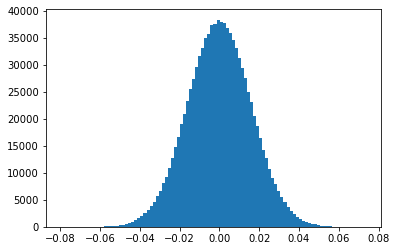

In [61]:
plt.hist(test_u, bins=100);

---
# Single particle in action angle space 
Work based on:
- TRACE3D Manual
- MERLIN C++ Accelerator Physics Libraries
- PyORBIT code

In [62]:
class MatchedBunchGenerator1D:
    
    def __init__(self, emittance, alpha, beta):
        self.alpha = alpha
        self.beta = beta
        self.gamma = (1.0+self.alpha**2)/self.beta
        self.emittance = emittance
        self.__initialise()        
    
    def __initialise(self):
        self.u_max = math.sqrt(self.beta*self.emittance)
        self.up_coeff = math.sqrt(self.emittance/self.beta)
        self.up_max = math.sqrt(self.gamma*self.emittance)   
    
    def setRMSEmittance(self, emittance):
        self.emittance = emittance
        self.__initialise()  
    
    def getRMSEmittance(self):
        return (self.emittance)
    
    def getUMax(self):return self.u_max
    def getUPMax(self):return self.up_max
    
    def NormaliseCoordinates(self, u_raw, up_raw):
        '''Returns normalised coordinate and momentum
        u = sqrt(beta*emittance)*u_raw
        up = sqrt(emittance/beta)*(up_raw-alpha*u_raw)'''
        u = self.u_max * u_raw
        up = self.up_coeff * (up_raw - self.alpha * u_raw)
        return (u,up)
    
    def KV_1D(self):
        # Double RMS emittance
        original_emittance = self.emittance
        self.setRMSEmittance(original_emittance*2)
        
        sign_choices = (-1.,1.)
        u_raw = math.sin(2*math.pi*(random.random()-0.5))
        up_raw = random.choice(sign_choices)*math.sqrt(1.0 - u_raw**2)
        
        self.setRMSEmittance(original_emittance)
        return self.NormaliseCoordinates(u_raw, up_raw)
    
    def KV_1D_array(self, n):
        array_u = []
        array_up = []
        
        for i in range(int(n)):
            u, up = self.KV_1D()            
            array_u.append(u)
            array_up.append(up)
        
        return (array_u, array_up)        
    
    def Waterbag_1D(self):
        # 4 x RMS emittance
        original_emittance = self.emittance
        self.setRMSEmittance(original_emittance*4)
        
        sign_choices = (-1.,1.)
        u_raw = math.sin(2*math.pi*(random.random()-0.5))
        up_raw = random.choice(sign_choices)*math.sqrt(1.0 - u_raw**2)
        
        r = math.sqrt(random.random())        
        u,up = self.NormaliseCoordinates(u_raw, up_raw)
        
        self.setRMSEmittance(original_emittance)
        return(r*u, r*up)
    
    def Waterbag_1D_array(self, n):
        array_u = []
        array_up = []
        
        for i in range(int(n)):
            u, up = self.Waterbag_1D()            
            array_u.append(u)
            array_up.append(up)
        
        return (array_u, array_up)   
    
    # Limit given in sigma
    def Gaussian_1D(self, limit):
        u_raw = random.gauss(0.,1.0)
        up_raw = random.gauss(0.,1.0)
        
        if(limit > 0.):
            while((u_raw**2+up_raw**2) > limit**2):                
                u_raw = random.gauss(0.,1.0)
                up_raw = random.gauss(0.,1.0)        
    
        return self.NormaliseCoordinates(u_raw, up_raw)
    
    def Gaussian_1D_array(self, n):
        array_u = []
        array_up = []
        
        for i in range(int(n)):
            u, up = self.Gaussian_1D()            
            array_u.append(u)
            array_up.append(up)
        
        return (array_u, array_up)   

In [63]:
class MatchedBunchGenerator2D:
    
    def __init__(self, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y):
        self.alpha_x = alpha_x
        self.alpha_y = alpha_y
        self.beta_y = beta_y
        self.beta_x = beta_x
        self.gamma_x = (1.0+self.alpha_x**2)/self.beta_x
        self.gamma_y = (1.0+self.alpha_y**2)/self.beta_y
        self.emittance_x = emittance_x
        self.emittance_y = emittance_y
        self.__initialise()        
    
    def __initialise(self):
        self.x_max = math.sqrt(self.beta_x*self.emittance_x)    
        self.y_max = math.sqrt(self.beta_y*self.emittance_y)
        self.xp_coeff = math.sqrt(self.emittance_x/self.beta_x) 
        self.yp_coeff = math.sqrt(self.emittance_y/self.beta_y)
        self.xp_max = math.sqrt(self.gamma_x*self.emittance_x)  
        self.yp_max = math.sqrt(self.gamma_y*self.emittance_y)   
        
    def setRMSEmittance(self, emittance_x, emittance_y):
        self.emittance_x = emittance_x
        self.emittance_y = emittance_y
        self.__initialise()  
            
    def getRMSEmittance(self):
        return (self.emittance_x, emittance_y)

    def getXMax(self):return self.x_max
    def getXPMax(self):return self.xp_max    
    def getYMax(self):return self.y_max
    def getYPMax(self):return self.yp_max
    
    def NormaliseCoordinates(self, x_raw, xp_raw, y_raw, yp_raw):
        '''Returns normalised coordinates and momenta
        u = sqrt(beta*emittance)*u_raw
        up = sqrt(emittance/beta)*(up_raw-alpha*u_raw)'''        
        x = self.x_max * x_raw
        xp = self.xp_coeff * (xp_raw - self.alpha_x * x_raw)
        y = self.y_max * y_raw
        yp = self.yp_coeff * (yp_raw - self.alpha_y * y_raw)    
        return (x,xp,y,yp)
   
    def KV_2D(self):
        # 4 x RMS emittance
        original_emittance_x = self.emittance_x
        original_emittance_y = self.emittance_y
        self.setRMSEmittance(original_emittance_x*4,original_emittance_y*4)
        
        #x-y plane
        phi = 2*math.pi*(random.random()-0.5)
        rho = math.sqrt(random.random())
        x_raw = rho*math.cos(phi)
        y_raw = rho*math.sin(phi)
        #momentum
        p0 = math.sqrt(math.fabs(1. - rho**2))
        phi = 2*math.pi*(random.random()-0.5)
        xp_raw = p0*math.cos(phi)
        yp_raw = p0*math.sin(phi)
        (x,xp,y,yp) = self.NormaliseCoordinates(x_raw,xp_raw,y_raw,yp_raw)
        
        self.setRMSEmittance(original_emittance_x,original_emittance_y)
        return (x,xp,y,yp)    
    
    def KV_2D_array(self, n):
        array_x = []
        array_xp = []
        array_y = []
        array_yp = []
        
        for i in range(int(n)):
            x, xp, y, yp = self.KV_2D()            
            array_x.append(x)
            array_xp.append(xp)
            array_y.append(y)
            array_yp.append(yp)
        
        return (array_x, array_xp, array_y, array_yp)   
    
    def Waterbag_2D(self):
        # 6 x RMS emittance
        original_emittance_x = self.emittance_x
        original_emittance_y = self.emittance_y
        self.setRMSEmittance(original_emittance_x*6,original_emittance_y*6)
          
        #x-y plane
        phi = 2*math.pi*(random.random()-0.5)
        rho = math.sqrt(random.random())
        x_raw = rho*math.cos(phi)
        y_raw = rho*math.sin(phi)
        #momentum
        p0 = math.sqrt(math.fabs(1. - rho**2))
        phi = 2*math.pi*(random.random()-0.5)
        xp_raw = p0*math.cos(phi)
        yp_raw = p0*math.sin(phi)
        
        (x,xp,y,yp) = self.NormaliseCoordinates(x_raw,xp_raw,y_raw,yp_raw)        
        r = math.sqrt(math.sqrt(random.random()))
        
        self.setRMSEmittance(original_emittance_x,original_emittance_y)
        return (x*r,xp*r,y*r,yp*r)   

    def Waterbag_2D_array(self, n):
        array_x = []
        array_xp = []
        array_y = []
        array_yp = []
        
        for i in range(int(n)):
            x, xp, y, yp = self.Waterbag_2D()            
            array_x.append(x)
            array_xp.append(xp)
            array_y.append(y)
            array_yp.append(yp)
        
        return (array_x, array_xp, array_y, array_yp)   
    
    # Limits given in sigma
    def Gaussian_2D(self, x_limit, y_limit):
        x_raw = random.gauss(0.,1.0)
        xp_raw = random.gauss(0.,1.0)        
        if(x_limit > 0.):
            while((x_raw**2+xp_raw**2) > x_limit**2):                
                x_raw = random.gauss(0.,1.0)
                xp_raw = random.gauss(0.,1.0) 
                
        y_raw = random.gauss(0.,1.0)
        yp_raw = random.gauss(0.,1.0)
        if(y_limit > 0.):
            while((y_raw**2+yp_raw**2) > y_limit**2):                
                y_raw = random.gauss(0.,1.0)
                yp_raw = random.gauss(0.,1.0)             
                
        return self.NormaliseCoordinates(x_raw,xp_raw,y_raw,yp_raw)
    
    def Gaussian_2D_array(self, x_limit, y_limit, n):
        array_x = []
        array_xp = []
        array_y = []
        array_yp = []
        
        for i in range(int(n)):
            x, xp, y, yp = self.Gaussian_2D(x_limit, y_limit)            
            array_x.append(x)
            array_xp.append(xp)
            array_y.append(y)
            array_yp.append(yp)
        
        return (array_x, array_xp, array_y, array_yp)       

In [64]:
class MatchedBunchGenerator3D:
    
    def __init__(self, emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y):
        self.alpha_x = alpha_x
        self.alpha_y = alpha_y
        self.alpha_z = alpha_z
        self.beta_y = beta_y
        self.beta_x = beta_x
        self.beta_z = beta_z
        self.gamma_x = (1.0+self.alpha_x**2)/self.beta_x
        self.gamma_y = (1.0+self.alpha_y**2)/self.beta_y
        self.gamma_z = (1.0+self.alpha_z**2)/self.beta_z
        self.emittance_x = emittance_x
        self.emittance_y = emittance_y
        self.emittance_z = emittance_z
        self.__initialise()        
    
    def __initialise(self):
        self.x_max = math.sqrt(self.beta_x*self.emittance_x)    
        self.y_max = math.sqrt(self.beta_y*self.emittance_y)
        self.z_max = math.sqrt(self.beta_z*self.emittance_z)
        self.xp_coeff = math.sqrt(self.emittance_x/self.beta_x) 
        self.yp_coeff = math.sqrt(self.emittance_y/self.beta_y)
        self.zp_coeff = math.sqrt(self.emittance_z/self.beta_z)
        self.xp_max = math.sqrt(self.gamma_x*self.emittance_x)  
        self.yp_max = math.sqrt(self.gamma_y*self.emittance_y)   
        self.zp_max = math.sqrt(self.gamma_z*self.emittance_z)   
        
    def setRMSEmittance(self, emittance_x, emittance_y, emittance_z):
        self.emittance_x = emittance_x
        self.emittance_y = emittance_y        
        self.emittance_z = emittance_z
        self.__initialise()  
        
    def getRMSEmittance(self):
        return (self.emittance_x, emittance_y, emittance_z)

    def getXMax(self):return self.x_max
    def getXPMax(self):return self.xp_max    
    def getYMax(self):return self.y_max
    def getYPMax(self):return self.yp_max
    def getZMax(self):return self.z_max
    def getZPMax(self):return self.zp_max
    
    def NormaliseCoordinates(self, x_raw, xp_raw, y_raw, yp_raw, z_raw, zp_raw):
        '''Returns normalised coordinates and momenta
        u = sqrt(beta*emittance)*u_raw
        up = sqrt(emittance/beta)*(up_raw-alpha*u_raw)'''        
        x = self.x_max * x_raw
        xp = self.xp_coeff * (xp_raw - self.alpha_x * x_raw)
        y = self.y_max * y_raw
        yp = self.yp_coeff * (yp_raw - self.alpha_y * y_raw)    
        z = self.z_max * z_raw
        zp = self.zp_coeff * (zp_raw - self.alpha_z * z_raw)    
        return (x,xp,y,yp,z,zp)
    
    def KV_3D(self):
        # 6 x RMS emittance        
        original_emittance_x = self.emittance_x
        original_emittance_y = self.emittance_y
        original_emittance_z = self.emittance_z
        self.setRMSEmittance(original_emittance_x*6,original_emittance_y*6,original_emittance_z*6)
        
        #x-y-z-zp plane
        n_limit = 1000
        n_count = 0
        pxy2 = x_raw = y_raw = z_raw = zp_raw = 0.
        while(1 < 2):
            n_count = n_count + 1
            x_raw = 2*(random.random()-0.5)
            y_raw = 2*(random.random()-0.5)
            z_raw = 2*(random.random()-0.5)
            zp_raw = 2*(random.random()-0.5)
            pxy2 = 1.0 - x_raw**2 - y_raw**2 - z_raw**2 - zp_raw**2
            if(pxy2 > 0.):
                break
            if(n_count > n_limit):
                print("KV_3D: problem with Python random")
                print("Stop.")
                sys.exit(1)
                
        #make xp-yp plane
        pxy = math.sqrt(pxy2)
        phi = 2*math.pi*(random.random()-0.5)
        xp_raw = pxy*math.cos(phi)
        yp_raw = pxy*math.sin(phi)
        (x,xp,y,yp,z,zp) = self.NormaliseCoordinates(x_raw,xp_raw,y_raw,yp_raw,z_raw,zp_raw)
        
        self.setRMSEmittance(original_emittance_x,original_emittance_y,original_emittance_z)
        return (x,xp,y,yp,z,zp)   
    
    def KV_3D_array(self, n):
        array_x = []
        array_xp = []
        array_y = []
        array_yp = []
        array_z = []
        array_zp = []
        
        for i in range(int(n)):
            x, xp, y, yp, z, zp = self.KV_3D()            
            array_x.append(x)
            array_xp.append(xp)
            array_y.append(y)
            array_yp.append(yp)
            array_z.append(z)
            array_zp.append(zp)
        
        return (array_x, array_xp, array_y, array_yp, array_z, array_zp)
    
    def Waterbag_3D(self):
        # 8 x RMS emittance
        original_emittance_x = self.emittance_x
        original_emittance_y = self.emittance_y
        original_emittance_z = self.emittance_z
        self.setRMSEmittance(original_emittance_x*8,original_emittance_y*8,original_emittance_z*8)  
        
        #x-y-z-zp plane
        n_limit = 1000
        n_count = 0
        pxy2 = x_raw = y_raw = z_raw = zp_raw = 0.
        while(1 < 2):
            n_count = n_count + 1
            x_raw = 2*(random.random()-0.5)
            y_raw = 2*(random.random()-0.5)
            z_raw = 2*(random.random()-0.5)
            zp_raw = 2*(random.random()-0.5)
            pxy2 = 1.0 - x_raw**2 - y_raw**2 - z_raw**2 - zp_raw**2
            if(pxy2 > 0.):
                break
            if(n_count > n_limit):
                print("Waterbag_3D: problem with Python random")
                print("Stop.")
                sys.exit(1)
                
        #make xp-yp plane
        pxy = math.sqrt(pxy2)
        phi = 2*math.pi*(random.random()-0.5)
        xp_raw = pxy*math.cos(phi)
        yp_raw = pxy*math.sin(phi)
        (x,xp,y,yp,z,zp) = self.NormaliseCoordinates(x_raw,xp_raw,y_raw,yp_raw,z_raw,zp_raw)
        r = math.sqrt(math.sqrt(random.random()))
        
        self.setRMSEmittance(original_emittance_x,original_emittance_y,original_emittance_z)
        return (x*r,xp*r,y*r,yp*r,z*r,zp*r)         
    
    def Waterbag_3D_array(self, n):
        array_x = []
        array_xp = []
        array_y = []
        array_yp = []
        array_z = []
        array_zp = []
        
        for i in range(int(n)):
            x, xp, y, yp, z, zp = self.Waterbag_3D()            
            array_x.append(x)
            array_xp.append(xp)
            array_y.append(y)
            array_yp.append(yp)
            array_z.append(z)
            array_zp.append(zp)
        
        return (array_x, array_xp, array_y, array_yp, array_z, array_zp)
    
    # Limits given in sigma
    def Gaussian_3D(self, x_limit, y_limit, z_limit):
        x_raw = random.gauss(0.,1.0)
        xp_raw = random.gauss(0.,1.0)        
        if(x_limit > 0.):
            while((x_raw**2+xp_raw**2) > x_limit**2):                
                x_raw = random.gauss(0.,1.0)
                xp_raw = random.gauss(0.,1.0) 
                
        y_raw = random.gauss(0.,1.0)
        yp_raw = random.gauss(0.,1.0)
        if(y_limit > 0.):
            while((y_raw**2+yp_raw**2) > y_limit**2):                
                y_raw = random.gauss(0.,1.0)
                yp_raw = random.gauss(0.,1.0) 
                
        z_raw = random.gauss(0.,1.0)
        zp_raw = random.gauss(0.,1.0)
        if(z_limit > 0.):
            while((z_raw**2+zp_raw**2) > z_limit**2):                
                z_raw = random.gauss(0.,1.0)
                zp_raw = random.gauss(0.,1.0)    
                
        return self.NormaliseCoordinates(x_raw,xp_raw,y_raw,yp_raw,z_raw,zp_raw)
    
    def Gaussian_3D_array(self, x_limit, y_limit, z_limit, n):
        array_x = []
        array_xp = []
        array_y = []
        array_yp = []
        array_z = []
        array_zp = []
        
        for i in range(int(n)):
            x, xp, y, yp, z, zp = self.Gaussian_3D(x_limit, y_limit, z_limit)            
            array_x.append(x)
            array_xp.append(xp)
            array_y.append(y)
            array_yp.append(yp)
            array_z.append(z)
            array_zp.append(zp)
        
        return (array_x, array_xp, array_y, array_yp, array_z, array_zp)
     

# Test new classes

In [65]:
beta_x = 3.215250830692
beta_y = 18.598794417925
alpha_x =  -0.547366008626
alpha_y =  2.750780302852
D_x =  -0.000103040524
D_xp = 0.001254020379
D_y = 0.
D_yp = 0.
emittance_x = emittance_y = 400 * 1E-6 * np.pi
x_limit = 5
y_limit = 5
n = 1E6

##### 2D Gaussian

In [66]:
Generator2D = MatchedBunchGenerator2D(emittance_x, emittance_y, alpha_x, beta_x, alpha_y, beta_y)

In [67]:
Generator2D.getRMSEmittance()

(0.0012566370614359172, 0.0012566370614359172)

In [68]:
array_x, array_xp, array_y, array_yp = Generator2D.Gaussian_2D_array(x_limit, y_limit, n)

x_dat = array_x
xp_dat = array_xp
y_dat = array_y
yp_dat = array_yp

x_max = xp_max = y_max = yp_max = x_min = xp_min = y_min = yp_min = 0.

bin_size_x = 128
bin_size_y = 128

if np.max(x_dat) > x_max : x_max = np.max(x_dat)            
if np.max(xp_dat) > xp_max : xp_max = np.max(xp_dat)            
if np.max(y_dat) > y_max : y_max = np.max(y_dat)            
if np.max(yp_dat) > yp_max : yp_max = np.max(yp_dat)      
    
if np.min(x_dat) < x_min : x_min = np.min(x_dat)            
if np.min(xp_dat) < xp_min : xp_min = np.min(xp_dat)            
if np.min(y_dat) < y_min : y_min = np.min(y_dat)            
if np.min(yp_dat) < yp_min : yp_min = np.min(yp_dat)    

In [69]:
x_min = -0.2
x_max = 0.2
xp_min = -0.1
xp_max = 0.1

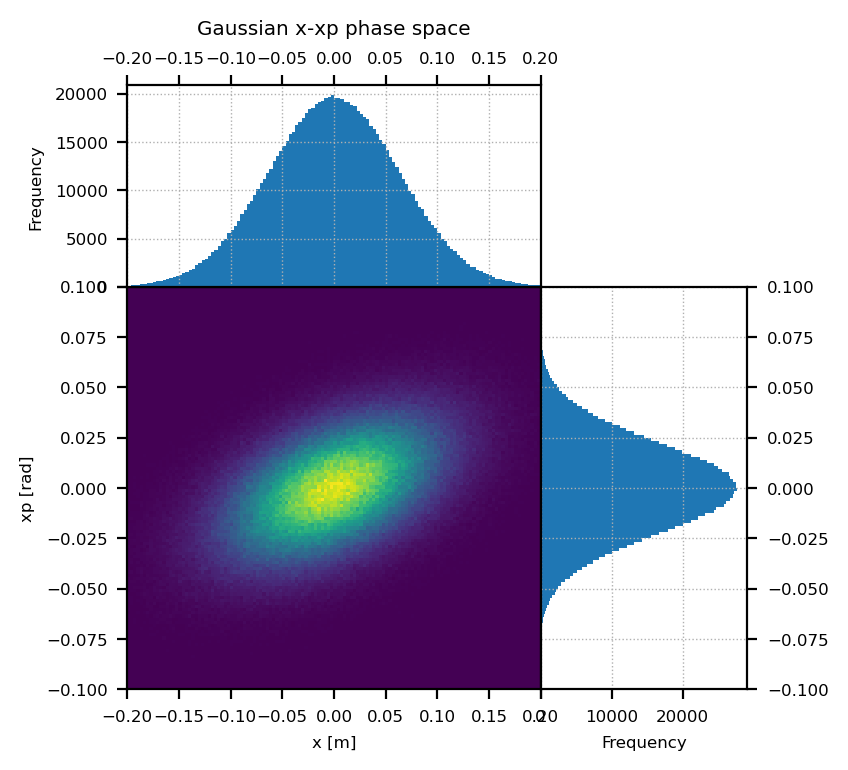

In [70]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 6
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.handlelength'] = 5

plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 0.25

fig3 = plt.figure(1,figsize=[4.0, 4.0], facecolor='white')
gridspec.GridSpec(3,3) # Create grid to resize subplots
fig3.subplots_adjust(hspace = 0) # Horizontal spacing between subplots
fig3.subplots_adjust(wspace = 0) # Vertical spacing between subplots

tit1 = 'Gaussian x-xp phase space'
multi = 1000

plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
plt.hist2d(x_dat, xp_dat, bin_size_x, range=[[x_min, x_max],[xp_min, xp_max]])
plt.xlabel('x [m]')
plt.ylabel('xp [rad]')
axis_main = plt.gca()
axis_main_ylim = axis_main.axes.get_ylim()
axis_main_xlim = axis_main.axes.get_xlim()

plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)
plt.hist(x_dat, bins = bin_size_x,  range = [x_min, x_max], density=False)
plt.grid(which='both', ls=':', lw=0.5)
plt.ylabel('Frequency')
axis_top = plt.gca()
axis_top.axes.set_xlim(axis_main_xlim)
axis_top.xaxis.set_ticks_position("top")
plt.title(tit1)

plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)
plt.hist(xp_dat, bins = bin_size_y,  range = [xp_min, xp_max], density=False, orientation=u'horizontal')
plt.grid(which='both', ls=':', lw=0.5)
plt.xlabel('Frequency')
axis_right = plt.gca()
axis_right.axes.set_ylim(axis_main_ylim)
axis_right.yaxis.set_ticks_position("right")

figname = '2D_Gaussian.png'
fig3.savefig(figname, bbox_inches='tight');


##### 2D KV

In [71]:
Generator2D.getRMSEmittance()

(0.0012566370614359172, 0.0012566370614359172)

In [72]:
array_x, array_xp, array_y, array_yp = Generator2D.KV_2D_array(n)

x_dat = array_x
xp_dat = array_xp
y_dat = array_y
yp_dat = array_yp

x_max = xp_max = y_max = yp_max = x_min = xp_min = y_min = yp_min = 0.

bin_size_x = 128
bin_size_y = 128

if np.max(x_dat) > x_max : x_max = np.max(x_dat)            
if np.max(xp_dat) > xp_max : xp_max = np.max(xp_dat)            
if np.max(y_dat) > y_max : y_max = np.max(y_dat)            
if np.max(yp_dat) > yp_max : yp_max = np.max(yp_dat)      
    
if np.min(x_dat) < x_min : x_min = np.min(x_dat)            
if np.min(xp_dat) < xp_min : xp_min = np.min(xp_dat)            
if np.min(y_dat) < y_min : y_min = np.min(y_dat)            
if np.min(yp_dat) < yp_min : yp_min = np.min(yp_dat)    

In [73]:
x_min = -0.2
x_max = 0.2
xp_min = -0.1
xp_max = 0.1

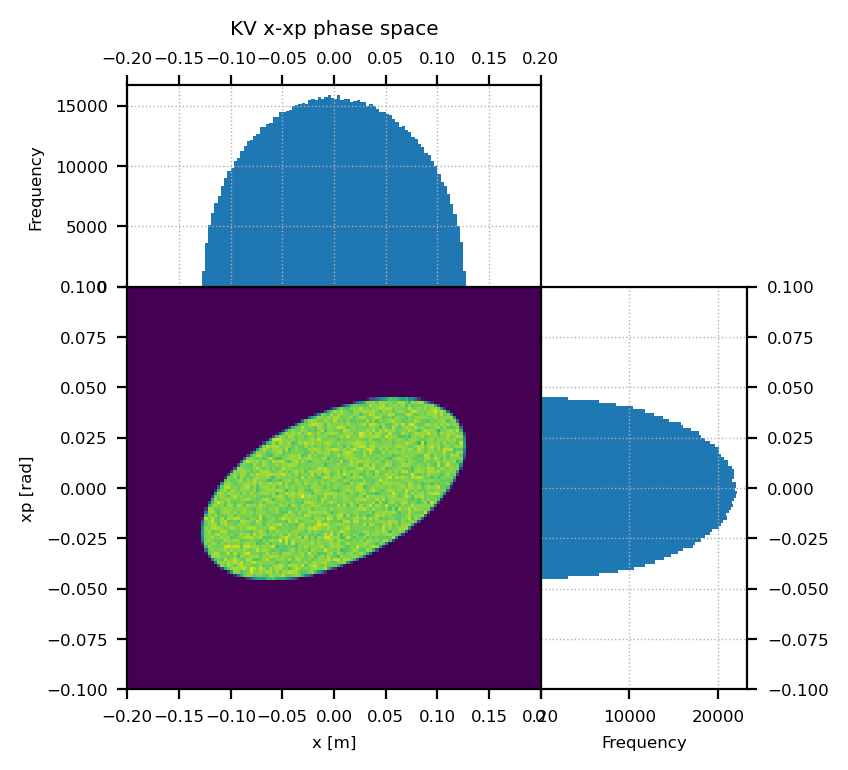

In [74]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 6
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.handlelength'] = 5

plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 0.25

fig3 = plt.figure(1,figsize=[4.0, 4.0], facecolor='white')
gridspec.GridSpec(3,3) # Create grid to resize subplots
fig3.subplots_adjust(hspace = 0) # Horizontal spacing between subplots
fig3.subplots_adjust(wspace = 0) # Vertical spacing between subplots

tit1 = 'KV x-xp phase space'
multi = 1000

plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
plt.hist2d(x_dat, xp_dat, bin_size_x, range=[[x_min, x_max],[xp_min, xp_max]])
plt.xlabel('x [m]')
plt.ylabel('xp [rad]')
axis_main = plt.gca()
axis_main_ylim = axis_main.axes.get_ylim()
axis_main_xlim = axis_main.axes.get_xlim()

plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)
plt.hist(x_dat, bins = bin_size_x,  range = [x_min, x_max], density=False)
plt.grid(which='both', ls=':', lw=0.5)
plt.ylabel('Frequency')
axis_top = plt.gca()
axis_top.axes.set_xlim(axis_main_xlim)
axis_top.xaxis.set_ticks_position("top")
plt.title(tit1)

plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)
plt.hist(xp_dat, bins = bin_size_y,  range = [xp_min, xp_max], density=False, orientation=u'horizontal')
plt.grid(which='both', ls=':', lw=0.5)
plt.xlabel('Frequency')
axis_right = plt.gca()
axis_right.axes.set_ylim(axis_main_ylim)
axis_right.yaxis.set_ticks_position("right")

figname = '2D_KV.png'
fig3.savefig(figname, bbox_inches='tight');


##### 2D Waterbag

In [75]:
Generator2D.getRMSEmittance()

(0.0012566370614359172, 0.0012566370614359172)

In [76]:
array_x, array_xp, array_y, array_yp = Generator2D.Waterbag_2D_array(n)

x_dat = array_x
xp_dat = array_xp
y_dat = array_y
yp_dat = array_yp

x_max = xp_max = y_max = yp_max = x_min = xp_min = y_min = yp_min = 0.

bin_size_x = 128
bin_size_y = 128

if np.max(x_dat) > x_max : x_max = np.max(x_dat)            
if np.max(xp_dat) > xp_max : xp_max = np.max(xp_dat)            
if np.max(y_dat) > y_max : y_max = np.max(y_dat)            
if np.max(yp_dat) > yp_max : yp_max = np.max(yp_dat)      
    
if np.min(x_dat) < x_min : x_min = np.min(x_dat)            
if np.min(xp_dat) < xp_min : xp_min = np.min(xp_dat)            
if np.min(y_dat) < y_min : y_min = np.min(y_dat)            
if np.min(yp_dat) < yp_min : yp_min = np.min(yp_dat)    

In [77]:
x_min = -0.2
x_max = 0.2
xp_min = -0.1
xp_max = 0.1

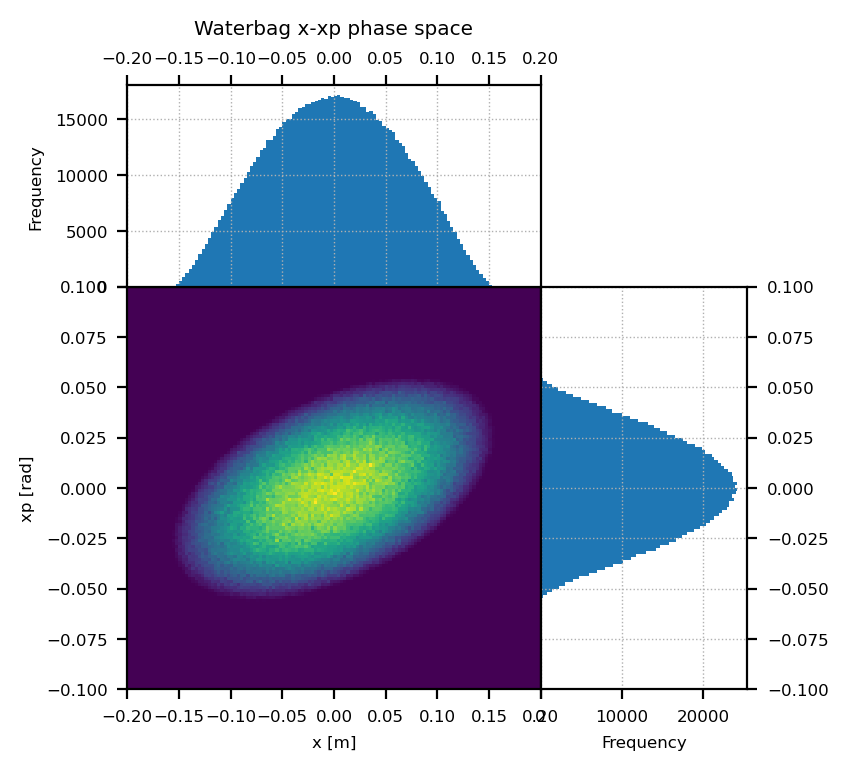

In [78]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 6
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['legend.handlelength'] = 5

plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 0.25

fig3 = plt.figure(1,figsize=[4.0, 4.0], facecolor='white')
gridspec.GridSpec(3,3) # Create grid to resize subplots
fig3.subplots_adjust(hspace = 0) # Horizontal spacing between subplots
fig3.subplots_adjust(wspace = 0) # Vertical spacing between subplots

tit1 = 'Waterbag x-xp phase space'
multi = 1000

plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2)
plt.hist2d(x_dat, xp_dat, bin_size_x, range=[[x_min, x_max],[xp_min, xp_max]])
plt.xlabel('x [m]')
plt.ylabel('xp [rad]')
axis_main = plt.gca()
axis_main_ylim = axis_main.axes.get_ylim()
axis_main_xlim = axis_main.axes.get_xlim()

plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=1)
plt.hist(x_dat, bins = bin_size_x,  range = [x_min, x_max], density=False)
plt.grid(which='both', ls=':', lw=0.5)
plt.ylabel('Frequency')
axis_top = plt.gca()
axis_top.axes.set_xlim(axis_main_xlim)
axis_top.xaxis.set_ticks_position("top")
plt.title(tit1)

plt.subplot2grid((3,3), (1,2), colspan=1, rowspan=2)
plt.hist(xp_dat, bins = bin_size_y,  range = [xp_min, xp_max], density=False, orientation=u'horizontal')
plt.grid(which='both', ls=':', lw=0.5)
plt.xlabel('Frequency')
axis_right = plt.gca()
axis_right.axes.set_ylim(axis_main_ylim)
axis_right.yaxis.set_ticks_position("right")

figname = '2D_Waterbag.png'
fig3.savefig(figname, bbox_inches='tight');
